<a href="https://colab.research.google.com/github/Tiwari666/Flask_Application-Project/blob/main/Income_level_prediction_flask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the dataset
import pandas as pd

import numpy as np
from sklearn import preprocessing

df = pd.read_csv('/content/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df = df.drop(['fnlwgt', 'educational-num'], axis=1)

In [ ]:
col_names = df.columns
print(col_names)

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')


In [ ]:
cat_col=df.select_dtypes(include=['object']).columns
print(cat_col)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


In [ ]:
for c in cat_col:
	print(df[c].value_counts())
	print("----------------------------")

workclass
 Private             18532
 Self-emp-not-inc     2099
 Local-gov            1736
 ?                    1495
 State-gov            1062
 Self-emp-inc          921
 Federal-gov           787
 Without-pay            10
 Never-worked            5
Name: count, dtype: int64
----------------------------
education
 HS-grad         8627
 Some-college    5965
 Bachelors       4408
 Masters         1394
 Assoc-voc       1124
 11th             961
 Assoc-acdm       859
 10th             767
 7th-8th          530
 Prof-school      466
 9th              424
 12th             349
 Doctorate        347
 5th-6th          259
 1st-4th          124
 Preschool         43
Name: count, dtype: int64
----------------------------
marital-status
 Married-civ-spouse       12205
 Never-married             8729
 Divorced                  3664
 Separated                  852
 Widowed                    826
 Married-spouse-absent      353
 Married-AF-spouse           18
Name: count, dtype: int64
----------

# **Replacing "?" by NAN:**

In [ ]:
import numpy as np

# Assuming col_names contains the column names where you want to replace '?'
for c in cat_col:
    df[c] = df[c].str.strip().replace("?", np.NaN)


# **Imputing the nan values:**

In [ ]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
df.isnull().sum ()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# **Handling Ourtliers:**

In [ ]:
# Define the numerical features to be scaled
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
import numpy as np

# Define the threshold for outlier detection (e.g., 3 standard deviations from the mean)
threshold = 3

# Function to detect and handle outliers
def handle_outliers(df, feature):
    mean = df[feature].mean()
    std = df[feature].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # Identify outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    # Decide how to handle outliers (e.g., remove or transform)
    # Here, we replace outliers with the nearest non-outlier value (winsorization)
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

# Loop through each numerical feature and handle outliers
for feature in numerical_features:
    handle_outliers(df, feature)


# **Featuring Engineering:**

Reducing the subclass of categorical variable under each feature.

In [ ]:
df['workclass'].replace({
    'Self-emp-inc': 'Private',
    'Self-emp-not-inc': 'Private',
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Federal-gov': 'Government',
    'Without-pay': 'Government',
    'Never-worked': 'Government',

}, inplace=True)

In [ ]:
df['workclass'].value_counts()

workclass
Private       23047
Government     3600
Name: count, dtype: int64

In [ ]:
df.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
           ['divorced', 'married', 'married', 'married', 'not married', 'not married', 'not married'], inplace=True)


In [ ]:
df['marital-status'].value_counts()

marital-status
married        12576
not married    10407
divorced        3664
Name: count, dtype: int64

In [ ]:
# Replace countries with broader categories
df['native-country'].replace({
    country: 'Other' for country in df['native-country'].unique() if country != 'United-States'
}, inplace=True)

In [ ]:
df['native-country'].value_counts()

native-country
United-States    24367
Other             2280
Name: count, dtype: int64

In [ ]:
# Replace education categories with broader categories
df['education'].replace({
    'HS-grad': 'High School',
    'Some-college': 'Undergraduate',
    'Bachelors': 'Undergraduate',
    'Masters': 'Graduate',
    'Assoc-voc': 'Undergraduate',
    'Assoc-acdm': 'Undergraduate',
    'Prof-school': 'Graduate',
    'Doctorate': 'Graduate',
    '10th': 'High School',
    '11th': 'High School',
    '12th': 'High School',
    '1st-4th': 'High School',
    '5th-6th': 'High School',
    '7th-8th': 'High School',
    '9th': 'High School',
    'Preschool': 'High School'
}, inplace=True)


In [ ]:
df['education'].value_counts()

education
Undergraduate    12356
High School      12084
Graduate          2207
Name: count, dtype: int64

In [ ]:
# Mapping of specific specialties to broader categories
specialty_mapping = {
    'Prof-specialty': 'Professional',
    'Craft-repair': 'Professional',  # Moving Craft-repair to Professional
    'Exec-managerial': 'Professional',
    'Adm-clerical': 'Service',  # Moving Adm-clerical to Service
    'Sales': 'Professional',  # Moving Sales to Professional
    'Other-service': 'Service',
    'Machine-op-inspct': 'Professional',  # Moving Machine-op-inspct to Professional
    'Transport-moving': 'Professional',  # Moving Transport-moving to Professional
    'Handlers-cleaners': 'Professional',  # Moving Handlers-cleaners to Professional
    'Farming-fishing': 'Professional',  # Moving Farming-fishing to Professional
    'Tech-support': 'Professional',
    'Protective-serv': 'Professional',
    'Priv-house-serv': 'Service',
    'Armed-Forces': 'Service'
}

# Replace specialties with broader categories
df['occupation'].replace(specialty_mapping, inplace=True)


In [ ]:
df['occupation'].value_counts()

occupation
Professional    20638
Service          6009
Name: count, dtype: int64

In [ ]:
# Mapping of specific relationships to broader categories
relationship_mapping = {
    'Husband': 'Family',
    'Wife': 'Family',
    'Not-in-family': 'Non-Family',
    'Own-child': 'Non-Family',
    'Unmarried': 'Non-Family',
    'Other-relative': 'Non-Family'
}

# Replace relationships with broader categories
df['relationship'].replace(relationship_mapping, inplace=True)

In [ ]:
df['relationship'].value_counts()

relationship
Non-Family    14618
Family        12029
Name: count, dtype: int64

In [ ]:
# Mapping of specific races to broader categories
race_mapping = {
    'White': 'White',
    'Black': 'Non-White',
    'Asian-Pac-Islander': 'Non-White',
    'Amer-Indian-Eskimo': 'Non-White',
    'Other': 'Non-White'
}

# Replace races with broader categories
df['race'].replace(race_mapping, inplace=True)

In [ ]:
df['race'].value_counts()

race
White        22789
Non-White     3858
Name: count, dtype: int64

In [ ]:
# Mapping of specific income levels to broader categories
income_mapping = {
    '<=50K': 'Low',
    '>50K': 'High'
}

# Replace income levels with broader categories
df['income'].replace(income_mapping, inplace=True)


In [ ]:
df['income'].value_counts()

income
Low     20258
High     6389
Name: count, dtype: int64

In [ ]:
# Create a new feature representing net capital change
df['net-capital-change'] = df['capital-gain'] - df['capital-loss']

# Drop the original 'capital-gain' and 'capital-loss' columns if needed
df.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)


In [ ]:
df.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,net-capital-change
0,39.0,Government,Undergraduate,not married,Service,Non-Family,White,Male,40.0,United-States,Low,2174.0
1,50.0,Private,Undergraduate,married,Professional,Family,White,Male,13.0,United-States,Low,0.0
2,38.0,Private,High School,divorced,Professional,Non-Family,White,Male,40.0,United-States,Low,0.0
3,53.0,Private,High School,married,Professional,Family,Non-White,Male,40.0,United-States,Low,0.0
4,28.0,Private,Undergraduate,married,Professional,Family,Non-White,Female,40.0,Other,Low,0.0
5,37.0,Private,Graduate,married,Professional,Family,White,Female,40.0,United-States,Low,0.0
6,49.0,Private,High School,married,Service,Non-Family,Non-White,Female,16.0,Other,Low,0.0
7,52.0,Private,High School,married,Professional,Family,White,Male,45.0,United-States,High,0.0
8,31.0,Private,Graduate,not married,Professional,Non-Family,White,Female,50.0,United-States,High,14084.0
9,42.0,Private,Undergraduate,married,Professional,Family,White,Male,40.0,United-States,High,5178.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26647 entries, 0 to 26646
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 26647 non-null  float64
 1   workclass           26647 non-null  object 
 2   education           26647 non-null  object 
 3   marital-status      26647 non-null  object 
 4   occupation          26647 non-null  object 
 5   relationship        26647 non-null  object 
 6   race                26647 non-null  object 
 7   gender              26647 non-null  object 
 8   hours-per-week      26647 non-null  float64
 9   native-country      26647 non-null  object 
 10  income              26647 non-null  object 
 11  net-capital-change  26647 non-null  float64
dtypes: float64(3), object(9)
memory usage: 2.4+ MB


In [ ]:
data=df.copy()

In [ ]:
# # Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# category_col = ['workclass', 'race', 'education', 'marital-status', 'occupation',
#                 'relationship', 'gender', 'native-country']

# mapping_dict = {}
# for col in category_col:
#     labelEncoder = LabelEncoder()
#     encoded_data = labelEncoder.fit_transform(df[col])

#     # Get the unique labels and their corresponding encoded values
#     unique_labels = df[col].unique()
#     encoded_values = labelEncoder.transform(unique_labels)

#     # Create a mapping dictionary preserving the original label order
#     le_name_mapping = {label: encoded_value for label, encoded_value in zip(unique_labels, encoded_values)}

#     # Update the mapping dictionary with encoded values as keys
#     inverse_mapping = {v: k for k, v in le_name_mapping.items()}
#     mapping_dict[col] = inverse_mapping

# print(mapping_dict)


{'workclass': {0: 0, 1: 1}, 'race': {1: 1, 0: 0}, 'education': {2: 2, 1: 1, 0: 0}, 'marital-status': {2: 2, 1: 1, 0: 0}, 'occupation': {1: 1, 0: 0}, 'relationship': {1: 1, 0: 0}, 'gender': {1: 1, 0: 0}, 'native-country': {1: 1, 0: 0}}


In [ ]:
df.head()

,age,hours-per-week,income,net-capital-change,workclass_Government,workclass_Private,education_Graduate,education_High School,education_Undergraduate,marital-status_divorced,...,occupation_Professional,occupation_Service,relationship_Family,relationship_Non-Family,race_Non-White,race_White,gender_Female,gender_Male,native-country_Other,native-country_United-States
0,39.0,40.0,Low,2174.0,True,False,False,False,True,False,...,False,True,False,True,False,True,False,True,False,True
1,50.0,13.0,Low,0.0,False,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,True
2,38.0,40.0,Low,0.0,False,True,False,True,False,True,...,True,False,False,True,False,True,False,True,False,True
3,53.0,40.0,Low,0.0,False,True,False,True,False,False,...,True,False,True,False,True,False,False,True,False,True
4,28.0,40.0,Low,0.0,False,True,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
numerical_features=df.select_dtypes(include=['int64', 'float64']).columns
# Scale the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [ ]:
df.head()

,age,hours-per-week,income,net-capital-change,workclass_Government,workclass_Private,education_Graduate,education_High School,education_Undergraduate,marital-status_divorced,...,occupation_Professional,occupation_Service,relationship_Family,relationship_Non-Family,race_Non-White,race_White,gender_Female,gender_Male,native-country_Other,native-country_United-States
0,0.029340,-0.025625,Low,0.513676,True,False,False,False,True,False,...,False,True,False,True,False,True,False,True,False,True
1,0.837784,-2.295279,Low,-0.214238,False,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,True
2,-0.044155,-0.025625,Low,-0.214238,False,True,False,True,False,True,...,True,False,False,True,False,True,False,True,False,True
3,1.058269,-0.025625,Low,-0.214238,False,True,False,True,False,False,...,True,False,True,False,True,False,False,True,False,True
4,-0.779105,-0.025625,Low,-0.214238,False,True,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False


# **Splitting the data into features and target:**

In [ ]:
X=df.drop(['income'],axis=1)
y=df['income']

In [ ]:
X.columns

Index(['age', 'hours-per-week', 'net-capital-change', 'workclass_Government',
       'workclass_Private', 'education_Graduate', 'education_High School',
       'education_Undergraduate', 'marital-status_divorced',
       'marital-status_married', 'marital-status_not married',
       'occupation_Professional', 'occupation_Service', 'relationship_Family',
       'relationship_Non-Family', 'race_Non-White', 'race_White',
       'gender_Female', 'gender_Male', 'native-country_Other',
       'native-country_United-States'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable 'income'
y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (by default, 75% training and 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [ ]:
import pandas as pd

# Convert the NumPy array y to a Pandas Series
y_series = pd.Series(y)

# Now you can call the value_counts() method on y_series
y_value_counts = y_series.value_counts()
print(y_value_counts)


1    20258
0     6389
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the data
X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
X_train.columns

Index(['age', 'hours-per-week', 'net-capital-change', 'workclass_Government',
       'workclass_Private', 'education_Graduate', 'education_High School',
       'education_Undergraduate', 'marital-status_divorced',
       'marital-status_married', 'marital-status_not married',
       'occupation_Professional', 'occupation_Service', 'relationship_Family',
       'relationship_Non-Family', 'race_Non-White', 'race_White',
       'gender_Female', 'gender_Male', 'native-country_Other',
       'native-country_United-States'],
      dtype='object')

# **Build and train the xgboost model:**

In [ ]:
import xgboost as xgb

# Initialize the XGBoost classifier with important parameters
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # Use binary logistic regression for binary classification
    learning_rate=0.1,  # Typical learning rate
    n_estimators=100,  # Number of boosting rounds (trees)
    max_depth=6,  # Maximum depth of a tree
    min_child_weight=1,  # Minimum sum of instance weight needed in a child
    gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    scale_pos_weight=1,  # Control the balance of positive and negative weights
    random_state=42  # Random seed for reproducibility
)
# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

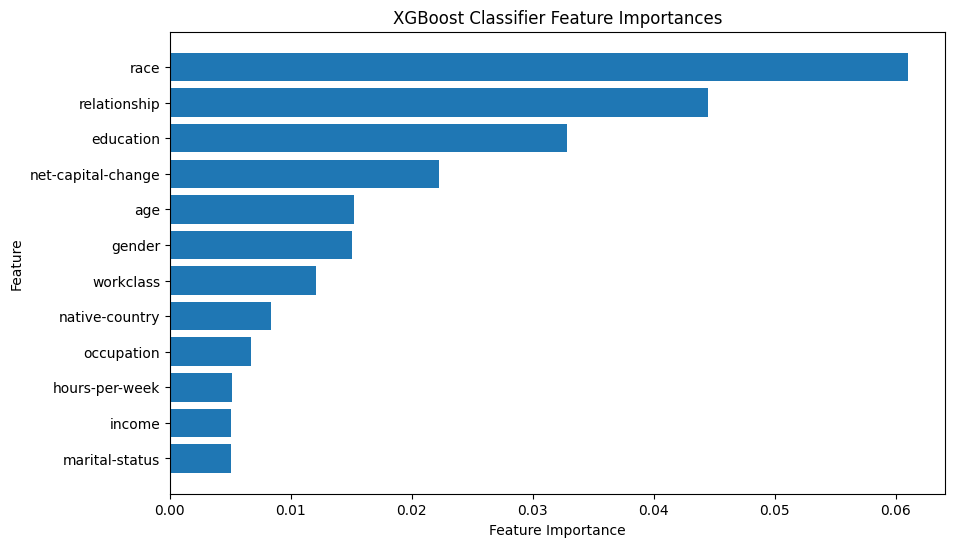

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances and corresponding feature names
feature_importances = xgb_classifier.feature_importances_
feature_names = data.columns

# Create a dictionary to hold feature importances and corresponding feature names
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances
sorted_feature_names = [feature[0] for feature in sorted_feature_importances]
sorted_feature_importances = [feature[1] for feature in sorted_feature_importances]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Classifier Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display features with highest importance at the top
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Predict the target variable on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Evaluation Metrics:
Accuracy: 0.8109
Precision: 0.9339
Recall: 0.8043
F1-score: 0.8643
ROC-AUC: 0.8174

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.83      0.69      1340
           1       0.93      0.80      0.86      3990

    accuracy                           0.81      5330
   macro avg       0.76      0.82      0.78      5330
weighted avg       0.85      0.81      0.82      5330


Confusion Matrix:
[[1113  227]
 [ 781 3209]]


# **Hyperperameter Tuning:**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import xgboost as xgb

# Define the hyperparameters distributions for random search
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist, n_iter=100,
                                   cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Perform random search to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Get the best model
best_model = random_search.best_estimator_


Best Hyperparameters:
{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}


In [ ]:
# Predict the target variable on the test set from tuned model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Evaluation Metrics:
Accuracy: 0.8255
Precision: 0.9153
Recall: 0.8451
F1-score: 0.8788
ROC-AUC: 0.8061

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69      1340
           1       0.92      0.85      0.88      3990

    accuracy                           0.83      5330
   macro avg       0.77      0.81      0.78      5330
weighted avg       0.84      0.83      0.83      5330


Confusion Matrix:
[[1028  312]
 [ 618 3372]]


# **FLASK APPLICATION DEVELOPMENT**

# **Serializing our best Model to deploy in the Flask:**

In [ ]:
import joblib

# Save the trained model as a pickle file
joblib.dump(best_model, 'model.pkl')

['model.pkl']

In [ ]:
!python --version

Python 3.10.12


# **PROCEDURES FOR MAKING THE FLASK APP IN THE TERMINAL/shell/command line:**

use "ctrl + c" to quit the flask application, if needed.

How to create virtual env to run flask app?

1. Open powershell/terminal and run the following code:

mkdir income-prediction

cd income-prediction

python -m venv venv

2.activate virtual env.

-.\venv\Scripts\Activate

3. pip install flask

4. mkdir templates or,  create a folder named templates manually inside our project folder "INCOME_PREDICTION" in the desktop

5. create index.html file inside templates folder manually and write the code for html form ( use the notepad++ to write the html code)

6. write the code for flask application (using the notepad++ or vscode) and import the "script.py" file inside our project folder "INCOME_PREDICTION" independently  

7. create and download serialized model named model.pkl from jupyter notebook and put it inside our project folder independently.

8. Go to the powershell/terminal then set up flask app env as main application file of our app using the following code:
    -$env:FLASK_APP = "script.py" (for cmd/powershell) and
    -set FLASK_APP = script.py (for cmd/powershell)
    -flask run
    -pip install necessary packages if prompted (e.g., pip install numpy)

9. Open/copy the link from terminal, paste the link in the browser and put the input feature from browser to get the output from the flask application developed so far.

# **Procedure for making the flask app using the Visual Studio:**

# **Steps:**

1)Download the application/program developed in the Jupyter Notebook and save it  as  "Model.pkl"

2)  Open  VisualStudio

3)  Create  a working folder called "Flask_Income" in lacal machine ( probably in the desktop).

4) Uplood the  "Model.pkl" file to the VS Code Studio.

5) Creat the folder called "Template" on the VS under the directory called "Flask_Income".

6) Create the Index.html file under the folder called "Template".

7) write the html code inside the index.html file.
It defines a form titled "Income Prediction Form". The form includes various input fields and dropdown menus for capturing information.

7) Create the result.html file under the folder called "Template" and write a HTML code.
This HTML code appears to be a template for displaying a prediction result.

8) Create a script.py file and write a python code inside the project folder ("Flask_Income") and outside the "template" directory and SAVE it.



This code sets up a Flask web application with two routes: one for rendering a form to collect input features and another for displaying the prediction result. The prediction is made using a pre-trained machine learning model loaded with pickle.

9) Open  the created link by running the Pytnon code (Flask main application code), selecting the link with pressing "CTRL + ENTER".


Note1: pip install in terminal
Note2: Control + c : Quit the application


---------OR Create a virtual Environment(venv)-------------

Steps:

--  python -m venv venv
-- .\venv\scripts\activate
--pip install flask
---   pip install numpy
--- pip install xgboost
---pip install all necessary packages.
Run the python code,using the arrow on the right top-end corner.



# **output:**
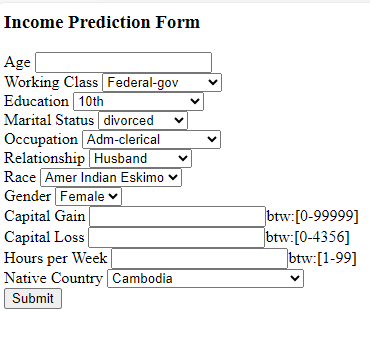

# Output:

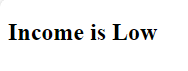